In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('train.tsv',sep='\t') #let's read the training dataset

In [17]:
data.head() #check the head of the data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [18]:
data['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [19]:
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


## Data Reduction(Drop useless data)

In [21]:
data=data.drop(['PhraseId','SentenceId'],axis=1)
data.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 2 columns):
Phrase       156060 non-null object
Sentiment    156060 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


## Interpretation of sentiments

In [23]:
def get_polarity(data):
        # set sentiment
        if data['Sentiment'] == 0:
            return 'negative'
        elif data['Sentiment'] == 1:
            return 'somewhat negative'
        elif data['Sentiment']==2:
            return 'neutral'
        elif data['Sentiment']==3:
            return 'somewhat positive'
        else:
            return 'positive'

In [24]:
data['Polarity'] = data.apply(get_polarity,axis=1)

In [25]:
data.head()

,Phrase,Sentiment,Polarity
0,A series of escapades demonstrating the adage ...,1,somewhat negative
1,A series of escapades demonstrating the adage ...,2,neutral
2,A series,2,neutral
3,A,2,neutral
4,series,2,neutral


## Checking for Null/Not available data entries 

In [26]:
data.isna().sum()

Phrase       0
Sentiment    0
Polarity     0
dtype: int64

In [27]:
data.isnull().sum()

Phrase       0
Sentiment    0
Polarity     0
dtype: int64

## Visualize number of reviews for each sentiment 

neutral              79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
Name: Polarity, dtype: int64


Text(0.5,0,'Sentiment expressed in Reviews')

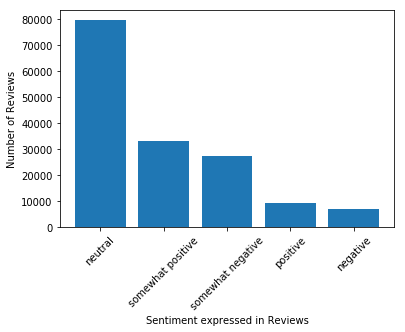

In [28]:
Index = [1,2,3,4,5]
print(data.Polarity.value_counts())
plt.bar(Index,data.Polarity.value_counts())
plt.xticks(Index,['neutral','somewhat positive','somewhat negative','positive','negative'],rotation=45)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

## Class imbalance detected - eliminated through oversampling after preproccessing *                                                                                                                                                                                                    

In [29]:
data['Length'] = data['Phrase'].apply(lambda x: len(str(x).split(' ')))

In [30]:
data.head(10)

,Phrase,Sentiment,Polarity,Length
0,A series of escapades demonstrating the adage ...,1,somewhat negative,37
1,A series of escapades demonstrating the adage ...,2,neutral,14
2,A series,2,neutral,2
3,A,2,neutral,1
4,series,2,neutral,1
5,of escapades demonstrating the adage that what...,2,neutral,12
6,of,2,neutral,1
7,escapades demonstrating the adage that what is...,2,neutral,11
8,escapades,2,neutral,1
9,demonstrating the adage that what is good for ...,2,neutral,10


In [31]:
data['Length'].unique()

array([37, 14,  2,  1, 12, 11, 10,  3,  7,  6,  5,  4, 23, 22, 20, 19, 18,
       15,  9,  8, 21, 26, 25, 16, 13, 17, 30, 28, 27, 24, 41, 40, 36, 29,
       31, 32, 34, 33, 42, 39, 38, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52], dtype=int64)

### Boxplot of lengths to see number of outliers

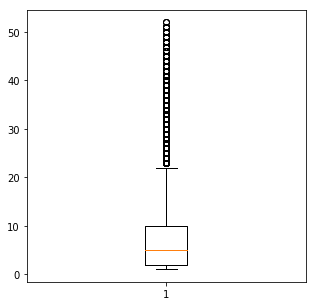

In [32]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(data['Length'])
plt.show()

### Check if outliers are useless

In [33]:
data[data['Length']>25]['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

## Visuliation of frequency of each sentiment wrt length of phrase

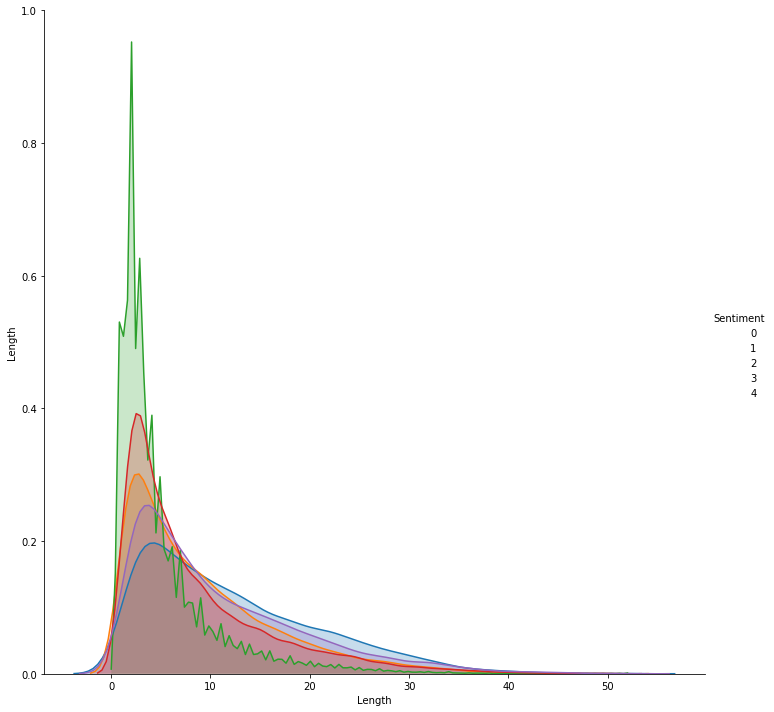

In [49]:
import seaborn as sns
sns.pairplot(data,hue='Sentiment',vars=['Length'],size=10)

### Same pattern of length for each sentiment i.e. they can't be classified on the basis of length

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(data.Phrase)

CountVectorizer(min_df=0.0, ngram_range=(1, 2))

In [36]:
len(cvector.get_feature_names())

94644

## Frequency of each word in whole corpus

In [ ]:
matrix = cvector.transform(data.Phrase)
words = matrix.sum(axis=0)
words_freq = [(word, words[0, idx]) for word, idx in cvector.vocabulary_.items()]
tf = pd.DataFrame(list(sorted(words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','frequency'])

In [51]:
tf.head(10)

,Terms,frequency
0,the,51633
1,of,32702
2,and,32177
3,to,22761
4,in,13997
5,is,13476
6,that,12338
7,it,11734
8,as,8651
9,with,7750


Text(0.5,1,'Top 50 words in movie reviews')

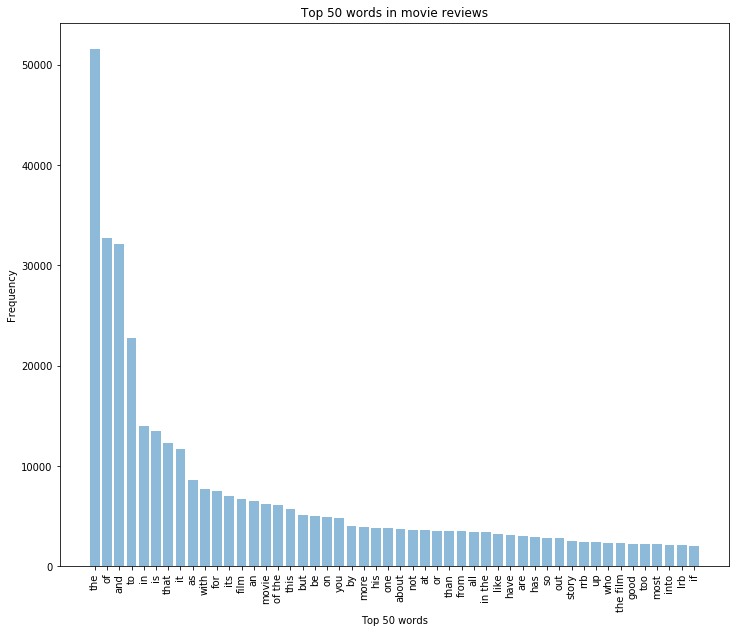

In [52]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, tf['frequency'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, tf['Terms'][:50],rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 words')
plt.title('Top 50 words in movie reviews')

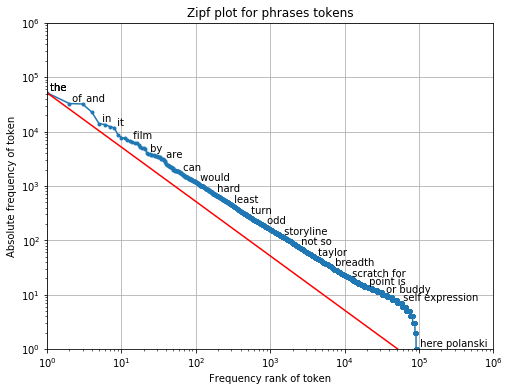

In [40]:
from pylab import *
counts = tf.frequency
tokens = tf.Terms
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")


We can clearly see that words like "the", "in","it", etc are much higher in frequency but has been ranked less as they don't have any significance regarding the sentiment of the movie review. On the other hand, some words like "downbeat laughably" have been given higher rank as they are very less frequent in the document and seems to be significant related to the sentiment of a movie.

In [41]:
neg_matrix = cvector.transform(data[data.Sentiment == 0].Phrase)
som_neg_matrix = cvector.transform(data[data.Sentiment == 1].Phrase)
neu_matrix = cvector.transform(data[data.Sentiment == 2].Phrase)
som_pos_matrix = cvector.transform(data[data.Sentiment == 3].Phrase)
pos_matrix = cvector.transform(data[data.Sentiment == 4].Phrase)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])
neg_tf_df = neg_tf.set_index('Terms')

som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_neg_tf = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_tf_df = som_neg_tf.set_index('Terms')
#som_neg_tf_df.head()

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')
#som_pos_words_tf_df.head()

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,som_neg_tf_df,neu_words_tf_df,som_pos_words_tf_df,pos_words_tf_df],axis=1)


term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)


,negative,some-negative,neutral,some-positive,positive,total
the,3462,10885,20619,12459,4208,51633
of,2277,6660,12287,8405,3073,32702
and,2549,6204,10241,9180,4003,32177
to,1916,5571,8295,5411,1568,22761
in,1038,2965,5562,3365,1067,13997
is,1372,3362,3703,3489,1550,13476
that,1139,2982,3677,3280,1260,12338
it,1086,3067,3791,2927,863,11734
as,757,2184,2941,2037,732,8651
with,452,1533,2471,2365,929,7750


### Extract useful and uniform text

In [42]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [43]:
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
def stemTokens(tokens):
    stemmer = PorterStemmer()
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return " ".join(stemmed)

def lemTokens(tokens):
    lemmer = nltk.stem.WordNetLemmatizer()
    lemmed = []
    for token in tokens:
        lemmed.append(lemmer.lemmatize(token))
    return " ".join(lemmed)

In [44]:
def tokenize (text):
      tokens = nltk.word_tokenize(text)
      res= lemTokens(tokens)
      tokens = nltk.word_tokenize(res)
      res = stemTokens(tokens)
      return res

In [45]:
def review_to_words(review, string = True, remove_stopwords=True):
    # Remove HTML
    review_text = BeautifulSoup(review).get_text()
    # Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # Convert words to lower case and split them
    words = review_text.lower().split()
    # Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    if string:
        return " ".join(words)
    else:
        return words

In [46]:
data['Refined_Phrase']=data['Phrase'].apply(lambda x: review_to_words(x))

In [47]:
data['Final_Phrase']=data['Refined_Phrase'].apply(lambda x: tokenize(x))

In [53]:
data.head()

,Phrase,Sentiment,Polarity,Length,Refined_Phrase,Final_Phrase
0,A series of escapades demonstrating the adage ...,1,somewhat negative,37,series escapades demonstrating adage good goos...,seri escapad demonstr adag good goos also good...
1,A series of escapades demonstrating the adage ...,2,neutral,14,series escapades demonstrating adage good goose,seri escapad demonstr adag good goos
2,A series,2,neutral,2,series,seri
3,A,2,neutral,1,,
4,series,2,neutral,1,series,seri


In [54]:
data[data['Final_Phrase'].str.len() == 0].head(10)

,Phrase,Sentiment,Polarity,Length,Refined_Phrase,Final_Phrase
3,A,2,neutral,1,,
6,of,2,neutral,1,,
13,the,2,neutral,1,,
16,that,2,neutral,1,,
18,what,2,neutral,1,,
20,is,2,neutral,1,,
24,for,2,neutral,1,,
37,",",2,neutral,1,,
39,some of which,2,neutral,3,,
40,some,2,neutral,1,,


In [55]:
data.to_csv("refined_phrases.csv")

In [8]:
data=pd.read_csv("refined_phrases.csv",index_col=0)

In [9]:
data.head()

,Phrase,Sentiment,Polarity,Length,Refined_Phrase,Final_Phrase
0,A series of escapades demonstrating the adage ...,1,somewhat negative,37,series escapades demonstrating adage good goos...,seri escapad demonstr adag good goos also good...
1,A series of escapades demonstrating the adage ...,2,neutral,14,series escapades demonstrating adage good goose,seri escapad demonstr adag good goos
2,A series,2,neutral,2,series,seri
3,A,2,neutral,1,NaN,NaN
4,series,2,neutral,1,series,seri


In [10]:
data.isna().sum()
data=data.fillna("")
data.head(10)

,Phrase,Sentiment,Polarity,Length,Refined_Phrase,Final_Phrase
0,A series of escapades demonstrating the adage ...,1,somewhat negative,37,series escapades demonstrating adage good goos...,seri escapad demonstr adag good goos also good...
1,A series of escapades demonstrating the adage ...,2,neutral,14,series escapades demonstrating adage good goose,seri escapad demonstr adag good goos
2,A series,2,neutral,2,series,seri
3,A,2,neutral,1,,
4,series,2,neutral,1,series,seri
5,of escapades demonstrating the adage that what...,2,neutral,12,escapades demonstrating adage good goose,escapad demonstr adag good goos
6,of,2,neutral,1,,
7,escapades demonstrating the adage that what is...,2,neutral,11,escapades demonstrating adage good goose,escapad demonstr adag good goos
8,escapades,2,neutral,1,escapades,escapad
9,demonstrating the adage that what is good for ...,2,neutral,10,demonstrating adage good goose,demonstr adag good goos


In [11]:
data.isna().sum()

Phrase            0
Sentiment         0
Polarity          0
Length            0
Refined_Phrase    0
Final_Phrase      0
dtype: int64

#### Objects with empty final phrase are of same sentiment i.e. no need to insert any other value

In [12]:
data=data.drop(['Phrase','Refined_Phrase','Length'],axis=1)
data.head()

,Sentiment,Polarity,Final_Phrase
0,1,somewhat negative,seri escapad demonstr adag good goos also good...
1,2,neutral,seri escapad demonstr adag good goos
2,2,neutral,seri
3,2,neutral,
4,2,neutral,seri


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156060 entries, 0 to 156059
Data columns (total 3 columns):
Sentiment       156060 non-null int64
Polarity        156060 non-null object
Final_Phrase    156060 non-null object
dtypes: int64(1), object(2)
memory usage: 4.8+ MB


In [62]:
matrix2 = cvector.transform(data.Final_Phrase)
words2 = matrix2.sum(axis=0)
words_freq2 = [(word, words2[0, idx]) for word, idx in cvector.vocabulary_.items()]
tf2 = pd.DataFrame(list(sorted(words_freq2, key = lambda x: x[1], reverse=True)),columns=['Terms','frequency'])

In [63]:
tf2.head(10)

,Terms,frequency
0,film,7831
1,one,3958
2,like,3602
3,make,2968
4,time,2622
5,rrb,2438
6,good,2331
7,lrb,2098
8,life,2096
9,work,2061


Text(0.5,1,'Top 50 words in movie reviews')

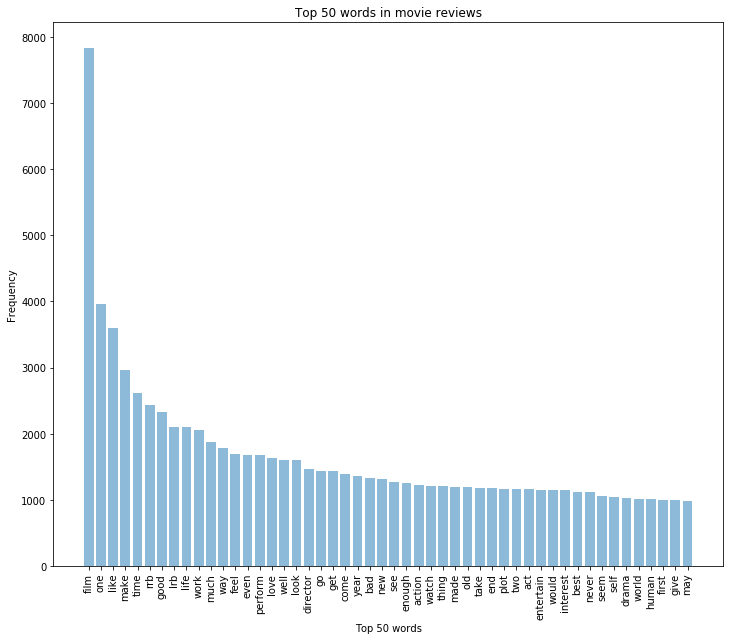

In [64]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, tf2['frequency'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, tf2['Terms'][:50],rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 words')
plt.title('Top 50 words in movie reviews')

neutral              79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
Name: Polarity, dtype: int64


Text(0.5,0,'Sentiment expressed in Reviews')

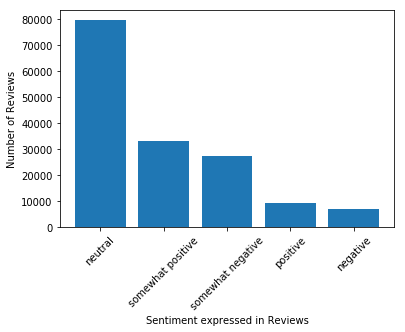

In [14]:
Index = [1,2,3,4,5]
print(data.Polarity.value_counts())
plt.bar(Index,data.Polarity.value_counts())
plt.xticks(Index,['neutral','somewhat positive','somewhat negative','positive','negative'],rotation=45)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

In [15]:
sent_2 = data[data['Sentiment']==2]
#we will copy class 0, 11 times
sent_0 = data[data['Sentiment']==0]
#we will copy class 1, 2 times
sent_1 = data[data['Sentiment']==1]
#we will copy class 3, 2 times
sent_3 = data[data['Sentiment']==3]
#we will copy class 4, 8 times
sent_4 = data[data['Sentiment']==4]

#-----------------------------------------------------
data = data.append([sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0])
data = data.append([sent_1,sent_1])
data = data.append([sent_3])
data = data.append([sent_4,sent_4,sent_4,sent_4,sent_4,sent_4,sent_4])

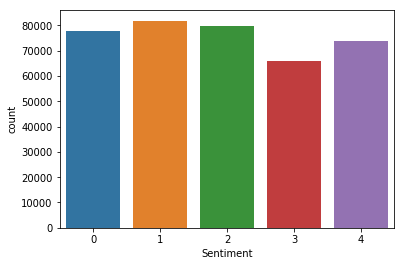

In [16]:
sns.countplot(data=data,x='Sentiment')

## TF-IDF vs Count Vectorize

### Count Vectorize- ( Convert collection of text documents to a matrix of the counts of occurences of each word in the document.)

### TF-IDF (stands for Term-Frequency-Inverse-Document Frequency) weights down the common words occuring in almost all the documents and give more importance to the words that appear in a subset of documents.

#### In other words, the rth most frequent word has a frequency f(r) that scales according to
#### f(r)∝1/r^α for α≈1

In [17]:
from sklearn.model_selection import train_test_split
X = data['Final_Phrase']
y = data['Sentiment']
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(x_train)
cv_test_features = cv.transform(x_test)

tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(x_train)
tv_test_features = tv.transform(x_test)

In [70]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (284021, 10000)  Test features shape: (94674, 10000)
TFIDF model:> Train features shape: (284021, 73295)  Test features shape: (94674, 73295)


In [21]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)

## Test1- The Naive Bayes

### Count Vectorizer

In [134]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()

In [135]:
nb_bow_predictions = train_predict_model(classifier=NB, train_features=cv_train_features, train_labels=y_train,
                                        test_features=cv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=nb_bow_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.5348
Precision: 0.5237
Recall: 0.5348
F1 Score: 0.5175

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.57      0.76      0.65     19372
           1       0.48      0.46      0.47     20469
           2       0.51      0.33      0.40     20060
           3       0.47      0.34      0.40     16425
           4       0.58      0.79      0.67     18348

    accuracy                           0.53     94674
   macro avg       0.52      0.53      0.52     94674
weighted avg       0.52      0.53      0.52     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                         
                   0     1     2     3      4
Actual: 0      14628  3362   699   264    419
        1       6299  9343  2720  1057   1050
        2       3215  4735  6562  2558   2990
        3       1040  1415  2320  

### TF-IDF

In [136]:
nb_tfidf_predictions = train_predict_model(classifier=NB, train_features=tv_train_features, train_labels=y_train,
                                            test_features=tv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=nb_tfidf_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6344
Precision: 0.627
Recall: 0.6344
F1 Score: 0.6181

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.66      0.87      0.75     19372
           1       0.61      0.58      0.59     20469
           2       0.61      0.41      0.49     20060
           3       0.60      0.43      0.50     16425
           4       0.66      0.88      0.76     18348

    accuracy                           0.63     94674
   macro avg       0.63      0.63      0.62     94674
weighted avg       0.63      0.63      0.62     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                          
                   0      1     2     3      4
Actual: 0      16797   2157   278    22    118
        1       5404  11828  2265   508    464
        2       2628   4388  8219  2485   2340
        3        652    980  2

#### We see TF-IDF is performing better in terms of all performance measures

#### Performance on Naive Bayes is not too good. Threshold accuracy should be atleast 80%

## Test2- K Nearest Neigbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=8)

### Elbow method to find N

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(tv_train_features,y_train)
    y_pred = knn.predict(tv_test_features)
    error_rate.append(np.mean(y_pred != y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K')
plt.plot(range(1,40),error_rate,color='blue',marker='o',markerfacecolor='pink',markersize=5,ls='--')

### TF-IDF

In [142]:
knn_tfidf_predictions = train_predict_model(classifier=KNN, train_features=tv_train_features, train_labels=y_train,
                                            test_features=tv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=knn_tfidf_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.7567
Precision: 0.7491
Recall: 0.7567
F1 Score: 0.7497

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.88     19372
           1       0.71      0.76      0.74     20469
           2       0.70      0.57      0.63     20060
           3       0.66      0.57      0.61     16425
           4       0.83      0.93      0.88     18348

    accuracy                           0.76     94674
   macro avg       0.75      0.75      0.75     94674
weighted avg       0.75      0.76      0.75     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                           
                   0      1      2     3      4
Actual: 0      18191   1134     27     0     20
        1       2801  15557   1705   335     71
        2        596   4049  11427  3475    513
        3        142   1

## Logistic Regression on Count Vectorizer

In [120]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)

In [123]:
lr_bow_predictions = train_predict_model(classifier=lr, train_features=cv_train_features, train_labels=y_train,
                                        test_features=cv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=lr_bow_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6472
Precision: 0.6418
Recall: 0.6472
F1 Score: 0.6413

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     19372
           1       0.59      0.52      0.55     20469
           2       0.58      0.70      0.64     20060
           3       0.54      0.42      0.47     16425
           4       0.74      0.79      0.76     18348

    accuracy                           0.65     94674
   macro avg       0.64      0.64      0.64     94674
weighted avg       0.64      0.65      0.64     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                           
                   0      1      2     3      4
Actual: 0      15251   3175    562   221    163
        1       4050  10640   4373   971    435
        2        646   2742  14067  2015    590
        3        341   1

## Logistic Regression on TF-IDF features

In [124]:
lr_tfidf_predictions = train_predict_model(classifier=lr, train_features=tv_train_features, train_labels=y_train,
                                            test_features=tv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=lr_tfidf_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.7078
Precision: 0.702
Recall: 0.7078
F1 Score: 0.7023

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     19372
           1       0.67      0.63      0.65     20469
           2       0.64      0.67      0.66     20060
           3       0.63      0.49      0.55     16425
           4       0.78      0.86      0.82     18348

    accuracy                           0.71     94674
   macro avg       0.70      0.70      0.70     94674
weighted avg       0.70      0.71      0.70     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                           
                   0      1      2     3      4
Actual: 0      16780   2228    241    29     94
        1       3740  12797   3183   539    210
        2        682   3154  13482  2143    599
        3        186    7

#### Here also TF-IDF outperform Count-Vectorize, still accuracy should be increased. Lets try Decision Tree

## Decision Tree

### Count Vectorizer

In [72]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [73]:
dt_bow_predictions = train_predict_model(classifier=DT, train_features=cv_train_features, train_labels=y_train,
                                        test_features=cv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=dt_bow_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.8019
Precision: 0.7964
Recall: 0.8019
F1 Score: 0.7961

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     19510
           1       0.80      0.79      0.79     20496
           2       0.74      0.68      0.71     19801
           3       0.75      0.60      0.67     16525
           4       0.85      0.95      0.90     18342

    accuracy                           0.80     94674
   macro avg       0.80      0.80      0.79     94674
weighted avg       0.80      0.80      0.80     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                           
                   0      1      2     3      4
Actual: 0      19033    358     81    13     25
        1       2841  16128   1169   248    110
        2        401   3125  13421  2463    391
        3         84    

### TF-IDF

In [74]:
dt_tfidf_predictions = train_predict_model(classifier=DT, train_features=tv_train_features, train_labels=y_train,
                                            test_features=tv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=dt_tfidf_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.8169
Precision: 0.8115
Recall: 0.8169
F1 Score: 0.811

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     19510
           1       0.81      0.81      0.81     20496
           2       0.76      0.67      0.71     19801
           3       0.76      0.63      0.69     16525
           4       0.86      0.97      0.91     18342

    accuracy                           0.82     94674
   macro avg       0.81      0.81      0.81     94674
weighted avg       0.81      0.82      0.81     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                            
                   0      1      2      3      4
Actual: 0      19252    225     21      2     10
        1       2649  16661    914    204     68
        2        380   3102  13321   2610    388
        3         64

#### Here also, TF-IDF outperforms Count-Vectorize which was obvious from the start. Now, onwards we will just try to improve accuracy of TF-IDF assuming that it will be better than Count-Vectorize in all cases. 

#### Accuracy of Decision Tree is satisfactory, still try RF and KNN

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_jobs=-1,max_depth=40)

### TF_IDF

In [26]:
rf_tfidf_predictions = train_predict_model(classifier=RF, train_features=tv_train_features, train_labels=y_train,
                                            test_features=tv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=rf_tfidf_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.5644
Precision: 0.67
Recall: 0.5644
F1 Score: 0.5389

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.85      0.67      0.75     19456
           1       0.54      0.50      0.52     20583
           2       0.38      0.79      0.52     19755
           3       0.90      0.07      0.14     16507
           4       0.73      0.73      0.73     18373

    accuracy                           0.56     94674
   macro avg       0.68      0.55      0.53     94674
weighted avg       0.67      0.56      0.54     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                           
                   0      1      2     3      4
Actual: 0      13014   2754   3536     0    152
        1       1788  10203   8193    11    388
        2        329   2973  15651   123    679
        3        172   207

In [29]:
RF2=RandomForestClassifier(n_jobs=-1,max_depth=25)

In [30]:
rf2_tfidf_predictions = train_predict_model(classifier=RF2, train_features=tv_train_features, train_labels=y_train,
                                            test_features=tv_test_features, test_labels=y_test)
display_model_performance_metrics(true_labels=y_test, predicted_labels=rf2_tfidf_predictions,classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.5115
Precision: 0.6371
Recall: 0.5115
F1 Score: 0.48

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      0.58      0.68     19456
           1       0.42      0.50      0.46     20583
           2       0.37      0.75      0.50     19755
           3       0.91      0.02      0.03     16507
           4       0.73      0.64      0.68     18373

    accuracy                           0.51     94674
   macro avg       0.65      0.50      0.47     94674
weighted avg       0.64      0.51      0.48     94674


Prediction Confusion Matrix:
------------------------------
          Predicted:                          
                   0      1      2    3      4
Actual: 0      11259   4501   3445    0    251
        1       1826  10221   8167    3    366
        2        361   3963  14909   23    499
        3        264   3591   9

### Decision tree performs best